In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# ================== IRIS DATASET ==================
iris_df = pd.read_csv("/content/iris_02.csv")
X_iris = iris_df.iloc[:, :-1].values
y_iris = iris_df.iloc[:, -1].values

# Split data (80% train, 20% test)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.20, random_state=0
)

# Train KNN (k=5 is reasonable for Iris)
knn_iris = KNeighborsClassifier(n_neighbors=5)
knn_iris.fit(X_train_iris, y_train_iris)

# Evaluate
y_pred_iris = knn_iris.predict(X_test_iris)
print("[IRIS RESULTS]")
print("Accuracy:", accuracy_score(y_test_iris, y_pred_iris))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_iris))
print("Classification Report:\n", classification_report(y_test_iris, y_pred_iris))

# ================== DIABETES DATASET ==================
diabetes_df = pd.read_csv("/content/diabetes.csv")

# Handle missing values (0s in some columns may be invalid)
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_df[zero_cols] = diabetes_df[zero_cols].replace(0, np.nan)
diabetes_df.fillna(diabetes_df.mean(), inplace=True)

X_diabetes = diabetes_df.iloc[:, :-1].values
y_diabetes = diabetes_df.iloc[:, -1].values

# Split data (80% train, 20% test)
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(
    X_diabetes, y_diabetes, test_size=0.20, random_state=0
)

# Feature scaling (critical for KNN)
scaler = StandardScaler()
X_train_diabetes = scaler.fit_transform(X_train_diabetes)
X_test_diabetes = scaler.transform(X_test_diabetes)

# Train KNN (k=11 is reasonable for Diabetes)
knn_diabetes = KNeighborsClassifier(n_neighbors=11)
knn_diabetes.fit(X_train_diabetes, y_train_diabetes)

# Evaluate
y_pred_diabetes = knn_diabetes.predict(X_test_diabetes)
print("\n[DIABETES RESULTS]")
print("Accuracy:", accuracy_score(y_test_diabetes, y_pred_diabetes))
print("Confusion Matrix:\n", confusion_matrix(y_test_diabetes, y_pred_diabetes))
print("Classification Report:\n", classification_report(y_test_diabetes, y_pred_diabetes))

[IRIS RESULTS]
Accuracy: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30


[DIABETES RESULTS]
Accuracy: 0.8116883116883117
Confusion Matrix:
 [[94 13]
 [16 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       107
           1       0.70      0.66      0.68        47

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.81      0.81      0.81       154



[HEART RESULTS - Best k = 16]
Accuracy: 0.8852459016393442
Confusion Matrix:
 [[26  3]
 [ 4 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



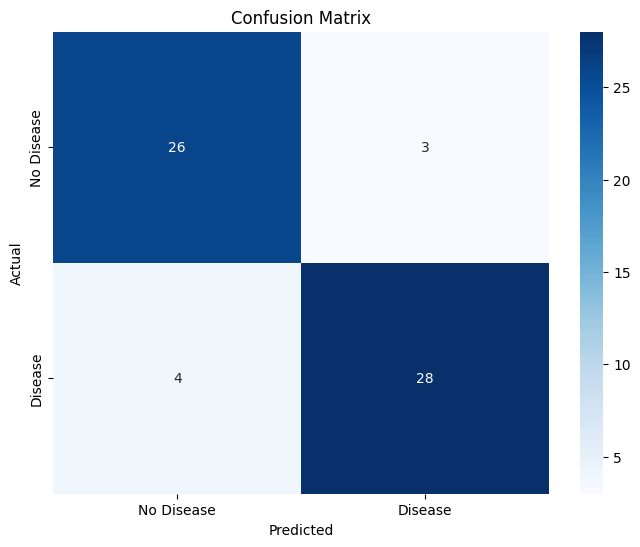

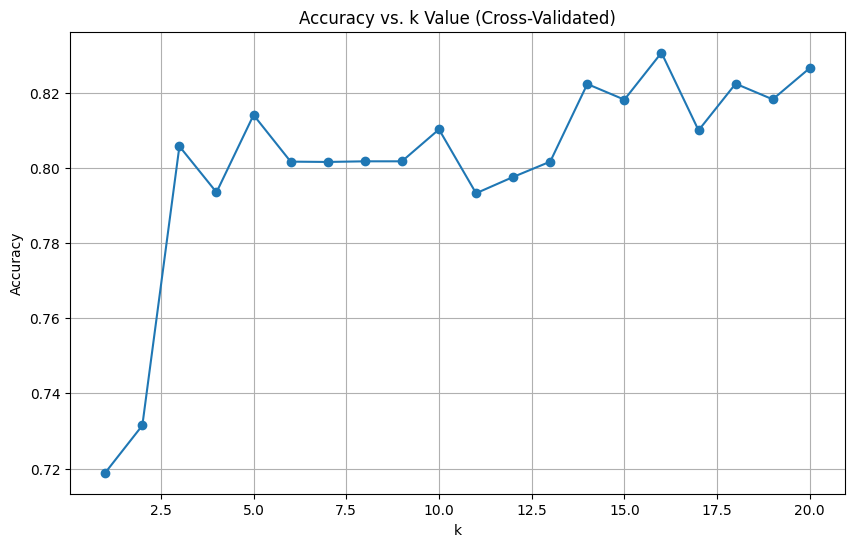

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
heart_df = pd.read_csv("/content/heart.csv")
X_heart = heart_df.iloc[:, :-1].values
y_heart = heart_df.iloc[:, -1].values

# Split data (80% train, 20% test)
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(
    X_heart, y_heart, test_size=0.20, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_heart = scaler.fit_transform(X_train_heart)
X_test_heart = scaler.transform(X_test_heart)

# Find best k using GridSearchCV
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_heart, y_train_heart)
best_k = grid_search.best_params_['n_neighbors']

# Train with best k
knn_heart = KNeighborsClassifier(n_neighbors=best_k)
knn_heart.fit(X_train_heart, y_train_heart)
y_pred_heart = knn_heart.predict(X_test_heart)

# Evaluate
print(f"[HEART RESULTS - Best k = {best_k}]")
print("Accuracy:", accuracy_score(y_test_heart, y_pred_heart))
print("Confusion Matrix:\n", confusion_matrix(y_test_heart, y_pred_heart))
print("Classification Report:\n", classification_report(y_test_heart, y_pred_heart))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_heart, y_pred_heart),
            annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot accuracy vs. k
k_values = range(1, 21)
accuracies = [grid_search.cv_results_['mean_test_score'][i-1] for i in k_values]
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. k Value (Cross-Validated)")
plt.grid()
plt.show()